In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

from rich import inspect

In [3]:
# clean dataset paths 
volume_path = '../data/clean/f3_interpretation/inline_vol.npy'
labels_path = '../data/clean/f3_interpretation/inline_label.npy'

volume_npy = np.load(volume_path)
label_npy = np.load(labels_path)

In [4]:
np.mean(volume_npy) , np.std(volume_npy) , np.min(volume_npy), np.max(volume_npy), np.max(np.abs(volume_npy)),np.median(volume_npy)

(2.866646, 2676.7498, -32767.0, 32767.0, 32767.0, 28.0)

In [5]:
np.quantile(np.abs(volume_npy), .99)

8611.0

In [6]:
# no of labels 
labels = np.unique(label_npy)
labels

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Class label :2 Count : 4732757
Class label :3 Count : 14376297
Class label :4 Count : 22541595
Class label :5 Count : 36762758
Class label :6 Count : 37491934
Class label :7 Count : 22159162
Class label :8 Count : 39799438
Class label :9 Count : 28465970


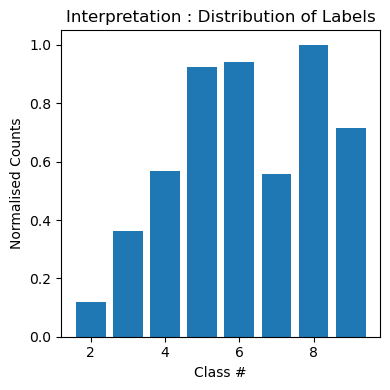

In [7]:
# Distribution of class labels 
counts = []
for label in labels : 
    count = label_npy[label_npy == label].shape[0]
    print(f'Class label :{label}','Count :', count )
    counts.append(count)
    
normalised_counts = [x / max(counts) for x in counts]
plt.figure(figsize=(4,4))
plt.bar(labels, normalised_counts, )
plt.xlabel('Class #')
plt.ylabel('Normalised Counts')
plt.title("Interpretation : Class Distribution")
plt.tight_layout()
plt.show()

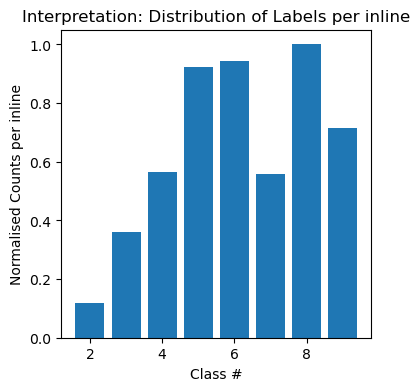

In [8]:
# mean distribution per inline 
# i.e total count by inline image size 
mean_counts_inline = [x / volume_npy.shape[0] / volume_npy.shape[1] for x in counts ]
mean_counts_inline_normalised = [ x / max(mean_counts_inline) for x in mean_counts_inline]
plt.figure(figsize=(4,4))
plt.bar(labels, mean_counts_inline_normalised, )
plt.xlabel('Class #')
plt.ylabel('Normalised Counts per inline')
plt.title("Interpretation: Average Class Distribution per inline");

In [9]:
total_data_points = volume_npy.shape[0] * volume_npy.shape[1] * volume_npy.shape[2]
total_data_points

206329911

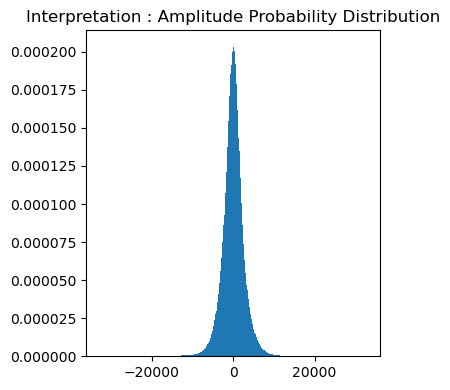

In [10]:
# data distribution 
plt.figure(figsize=(4,4))
plt.title('Interpretation : Amplitude Probability Distribution')
plt.hist(volume_npy.reshape(-1), bins=500,density=True)
plt.tight_layout()
plt.show()

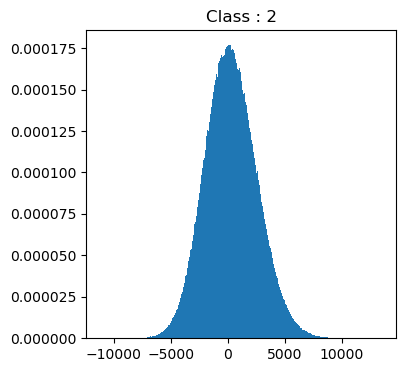

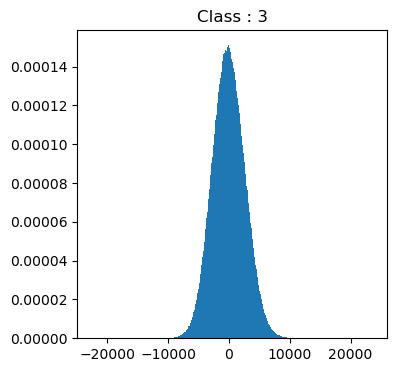

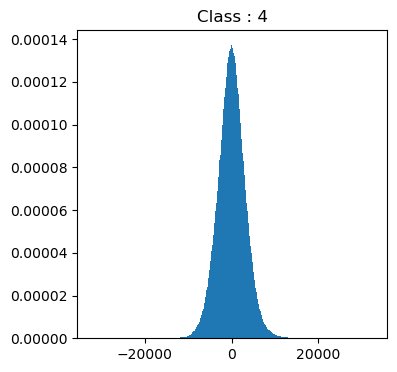

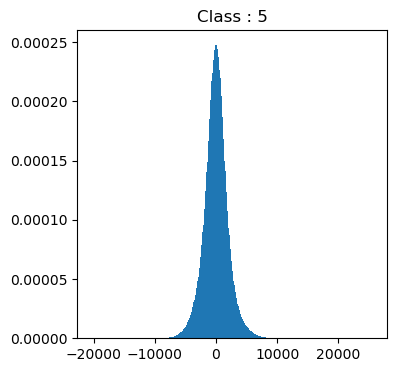

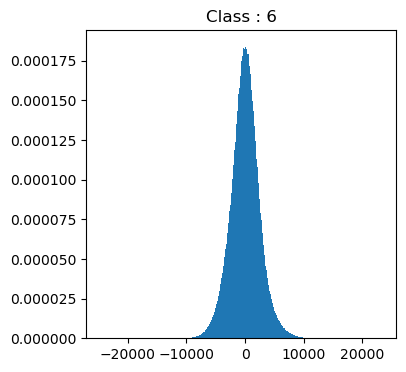

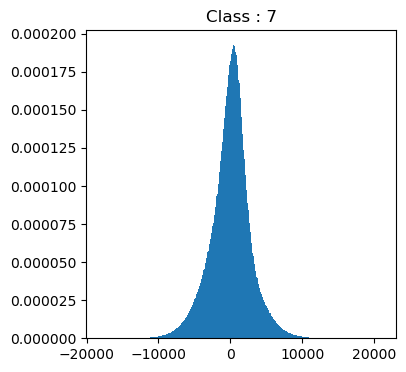

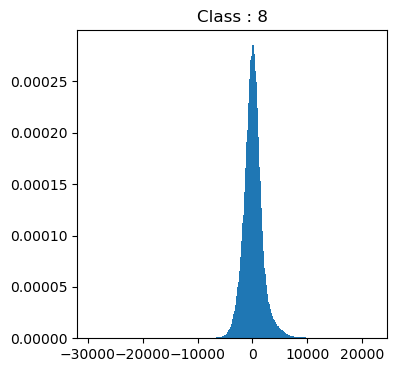

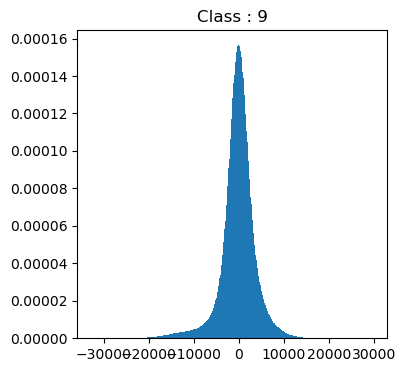

<Figure size 640x480 with 0 Axes>

In [11]:
# distribution of data in each class 
from copy import deepcopy 

def class_mask(label_npy, label) :
    label_npy = deepcopy(label_npy)
    condition = (label_npy == label)
    label_npy[condition] = 1 
    label_npy[~condition] = 0
    return label_npy

# sample plot 

label = 2

# label_mask = class_mask(label_npy, label)
# print(label_mask.shape,np.unique(label_mask))
# plt.imshow(label_mask[100].T, aspect='auto')

def data_by_class(volume_npy, label_npy, label) : 
    label_mask = class_mask(label_npy, label)
    positions = np.where(label_mask == 1)
    return volume_npy[positions]

# data distribution by class

# fig, ax = plt.subplots(ncols=len(labels), figsize=(20 * len(labels),8))
for i, label in enumerate(labels) : 
    volume = data_by_class(volume_npy, label_npy, label)
    plt.figure(figsize=(4,4))
    plt.hist(volume, bins=500, density=True)
    plt.title(f'Class : {label}')
    plt.show()

plt.tight_layout()
plt.suptitle('Interpretation : Data Probability distribution by class')
plt.show()

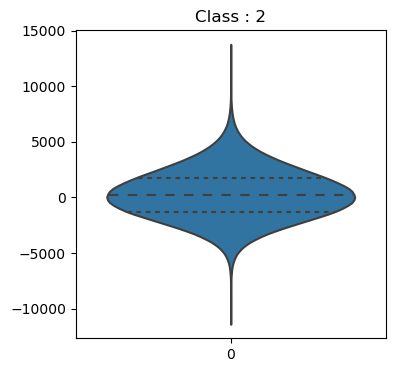

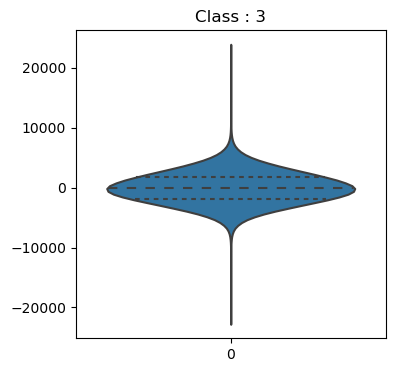

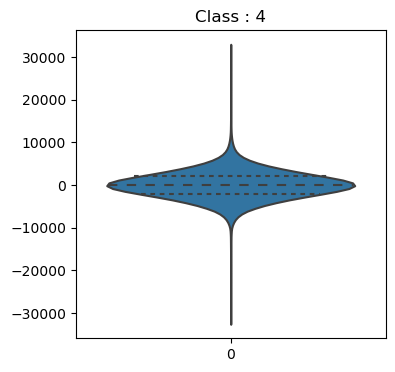

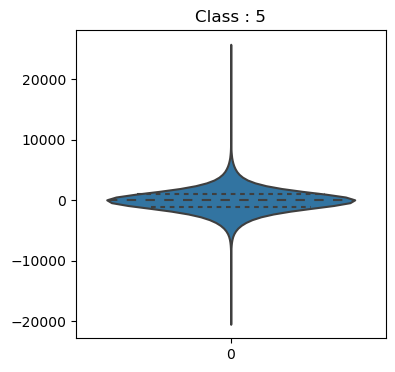

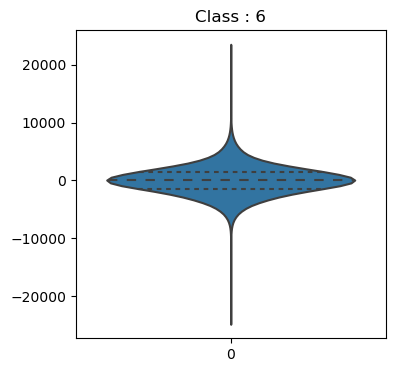

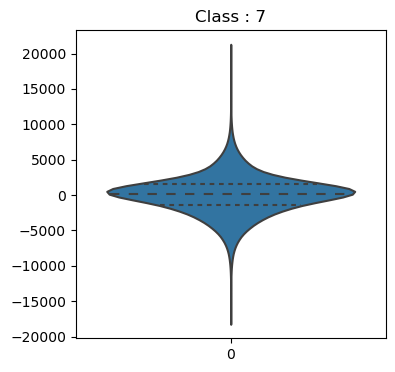

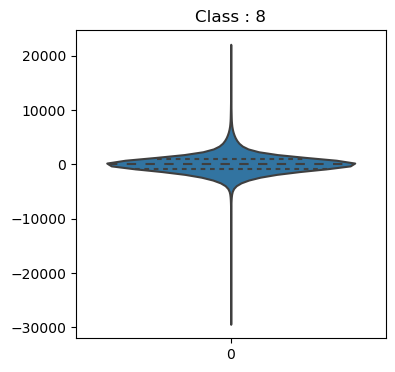

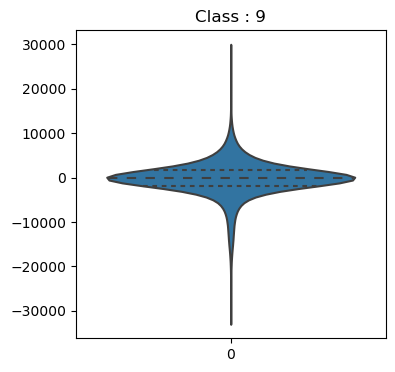

In [12]:
# violin plots 

import seaborn as sns 
for i, label in enumerate(labels) : 
    volume = data_by_class(volume_npy, label_npy, label)
    plt.figure(figsize=(4,4))
    sns.violinplot(volume, inner='quartile')
    plt.title(f'Class : {label}')
    plt.show()
    


In [20]:
# data frame
df = pd.DataFrame(columns=['data','label'])
import seaborn as sns 
for i, label in enumerate(labels) : 
    volume = data_by_class(volume_npy, label_npy, label)
    label = label * np.ones_like(volume.ravel())
    arr = np.zeros((len(volume),2))
    arr[:,0] = volume
    arr[:,1] = label
    print(volume.shape, label.shape, arr.shape)
    df = df.append(pd.DataFrame(arr, columns=df.columns), ignore_index=True)
    # plt.figure(figsize=(4,4))
    # sns.violinplot(volume, inner='quartile')
    # for v, l in zip(volume.ravel(), ) : 
    #     df = pd.concat([df,dict(data = v, label=l)], ignore_index=True)
    # df = df.append(dict(zip(volume.ravel(),label * np.ones_like(volume.ravel()))), ignore_index=True)
    # plt.title(f'Class : {label}')
    # plt.show()
df.shape
# data frame 

(4732757,) (4732757,) (4732757, 2)


/var/folders/sp/zn57pd5x763ckn5kp57fyvzw0000gn/T/ipykernel_23307/2981607263.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(arr, columns=df.columns), ignore_index=True)


(14376297,) (14376297,) (14376297, 2)
(22541595,) (22541595,) (22541595, 2)
(36762758,) (36762758,) (36762758, 2)
(37491934,) (37491934,) (37491934, 2)
(22159162,) (22159162,) (22159162, 2)
(39799438,) (39799438,) (39799438, 2)
(28465970,) (28465970,) (28465970, 2)


(206329911, 2)

In [23]:
sns.violinplot(data = df, x='data', y='label')

In [22]:
df.shape

(206329911, 2)